# 2022-08-04 

### voting, bagging, randomforest

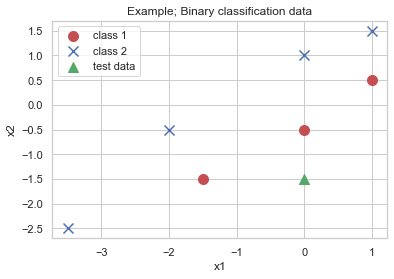

In [22]:
%matplotlib inline 

x = np.array([[0, -0.5], [-1.5, -1.5], [1, 0.5], [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])
x_new = [0, -1.5]

plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, marker='o', c='r', label="class 1")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, marker='x', c='b', label="class 2")
plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g', label="test data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Example; Binary classification data")
plt.legend()
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB() 
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], voting='soft', weights=(1,1,2))

probas = [c.fit(x,y).predict_proba([x_new]) for c in (model1, model2, model3, ensemble)] # 개별모델3, 앙상블1 에 대해 테스트데이터 클래스별 확률 예측 
print('probability per class for test data')
print(probas)

probability per class for test data
[array([[0.7713643, 0.2286357]]), array([[9.59836414e-10, 9.99999999e-01]]), array([[0.67309197, 0.32690803]]), array([[0.52938706, 0.47061294]])]


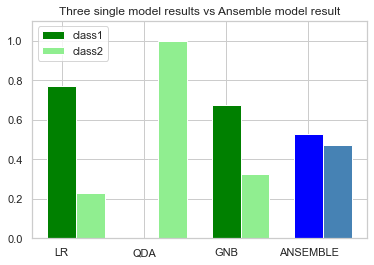

In [46]:
class1_1 = [pr[0,0] for pr in probas] # 클래스;1 에 대한 예측 확률들 4개
class2_1 = [pr[0,1] for pr in probas] # 클래스;2 에 대한 예측 확률들 4개

ind = np.arange(4)
width = 0.35 # bar plot 막대 너비 

p1 = plt.bar(ind, np.hstack([class1_1[:-1], [0]]), width, color='green')
p2 = plt.bar(ind+width, np.hstack([class2_1[:-1], [0]]), width, color='lightgreen')
p3 = plt.bar(ind, [0,0,0, class1_1[-1]], width, color='blue')
p4 = plt.bar(ind+width, [0,0,0, class2_1[-1]], width, color='steelblue')

plt.xticks(ind, ['LR', 'QDA', 'GNB', 'ANSEMBLE'])
plt.ylim([0, 1.1])
plt.title('Three single model results vs Ansemble model result')
plt.legend([p1[0], p2[0]], ['class1', 'class2'], loc='upper left')
plt.show()

In [77]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

x = data.data 
y = data.target 
feature_names = data.feature_names 

df = pd.DataFrame(x, columns=feature_names ) ; df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [60]:
df.describe() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [65]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [80]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.model_selection import cross_val_score 

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier([('lr', model1), ('qda', model2), ('gnb', model3)], voting='hard')

result_train = [(cross_val_score(model, x_train, y_train, scoring='accuracy', cv=5).mean(), np.std(cross_val_score(model, x_train, y_train, scoring='accuracy', cv=5))) for model in (model1, model2, model3, ensemble)]

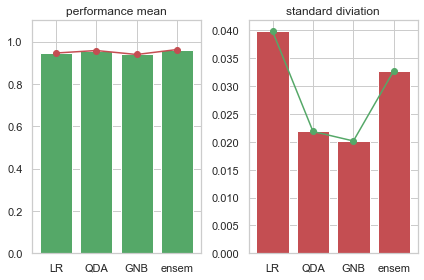

In [115]:
plt.subplot(1,2,1)
plt.bar(np.arange(4), [r[0] for r in result_train], color='g')
plt.plot(np.arange(4), [r[0] for r in result_train ], 'ro-')
plt.ylim([0, 1.1])
plt.title('performance mean')
plt.xticks(np.arange(4), ['LR', 'QDA', 'GNB', 'ensem'])
plt.subplot(1,2,2)
plt.bar(np.arange(4), [r[1] for r in result_train], color='r')
plt.plot(np.arange(4), [r[1] for r in result_train], 'go-')
plt.xticks(np.arange(4), ['LR', 'QDA', 'GNB', 'ensem'])
plt.title('standard diviation')

plt.tight_layout()
plt.show()

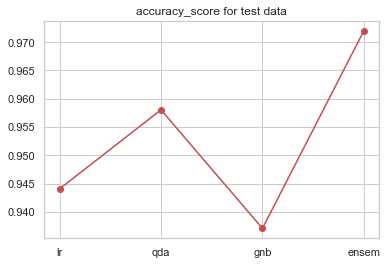

In [124]:
result_test = [model.fit(x_train, y_train).predict(x_test) for model in (model1, model2, model3, ensemble)] 
from sklearn.metrics import accuracy_score 

test_acc = [accuracy_score(r, y_test) for r in result_test]
plt.plot(np.arange(4), test_acc, 'ro-')
plt.xticks(np.arange(4), ['lr', 'qda', 'gnb', 'ensem'])
plt.title('accuracy_score for test data')
plt.show()

## 결론: 앙상블 모델이 개별모델보다 성능이 더 좋았다. 

# 배깅(Boostrap Aggregation)

In [147]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier

iris = load_iris() 
x, y = iris.data[:, [0,2]], iris.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

# 의사결정나무 분류기
model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(x_train, y_train)

# 랜덤포레스트 분류기; 100개 단일 의사결정나무 모형으로 구성. 
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(x_train, y_train) 

# 단일 의사결정나무 분류기 예측 
print(f'단일 의사결정나무 분류기 예측 정확도: {accuracy_score(model1.predict(x_test), y_test)}')

# 랜덤포레스트 분류기 예측 
print(f'랜덤포레스트 분류기 예측 정확도: {accuracy_score(model2.predict(x_test), y_test)}')

단일 의사결정나무 분류기 예측 정확도: 0.8947368421052632
랜덤포레스트 분류기 예측 정확도: 0.8947368421052632


#### 단일 모형보다 훨씬 깊이 얕은 의사결정나무 100개 엮었더니 단일모형과 같은 예측 정확도 달성했다. 

In [172]:
## 연습문제 2

from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer() 
x = bc.data 
y = bc.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(SVC(), n_estimators=10, random_state=0).fit(x_train, y_train)
model2 = SVC().fit(x_train, y_train)

model_result = cross_val_score(model, x_test, y_test, scoring='accuracy', cv=5).mean()
model2_result = cross_val_score(model2, x_test, y_test, scoring='accuracy', cv=5).mean() 

print(f'배깅모델 교차검증 정확도: {model_result}')
print(f'단일모델 교차검증 정확도: {model2_result}')

배깅모델 교차검증 정확도: 0.9302521008403362
단일모델 교차검증 정확도: 0.9184873949579831


In [181]:
# 랜덤포레스트 - 배깅모델의 한 종류

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

iris = load_iris() 

x, y = iris.data[:, [0,2]], iris.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

model1 = DecisionTreeClassifier(max_depth=10, random_state=10).fit(x_train, y_train)
model2 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(x_train, y_train)

print(f'단일 의사결정나무 정확도: {accuracy_score(y_test, model1.predict(x_test))}')
print(f'랜덤포레스트 정확도: {accuracy_score(y_test, model2.predict(x_test))}')

단일 의사결정나무 정확도: 0.8947368421052632
랜덤포레스트 정확도: 0.8947368421052632


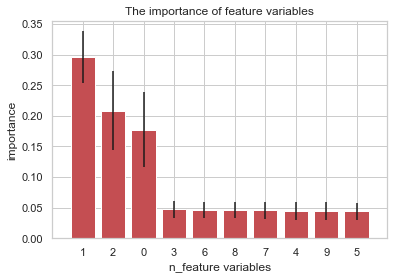

In [245]:
from sklearn.datasets import make_classification # 분류모델 테스트용; 조건에 맞는 가상데이터 생성
from sklearn.ensemble import ExtraTreesClassifier

x, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_classes=2, random_state=0, shuffle=False) # 모델 테스트용 가상데이터

forest = ExtraTreesClassifier(n_estimators=250, random_state=0) # 의사결정나무 250개로 구성된 랜덤포레스트 
forest.fit(x, y)

importances = forest.feature_importances_ # 각 특성변수의 정보획득량 평균

rf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(x, y)
rf.feature_importances_ # 일반 랜덤포레스트에 대해서도 정보획득량 평균 구할 수 있다. 

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# 내림차순 정렬했을 때 요소들 리스트 순서 
indicies = np.argsort(importances)[::-1]

plt.bar(range(10), importances[indicies], color= 'r', yerr=std[indicies], align='center')
plt.xticks(range(x.shape[1]), indicies)

plt.xlim([-1, x.shape[1]])
plt.title('The importance of feature variables')
plt.xlabel('n_feature variables')
plt.ylabel('importance')
plt.show()

In [270]:
# 올리베티 얼굴사진 데이터에 랜덤포레스트 적용하기 

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

data = fetch_olivetti_faces()
x = data.data ; y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [271]:
r_forest = RandomForestClassifier(random_state=2, n_estimators=250).fit(x_train, y_train)

## 각 이미지를 결정적으로 분류해내는 중요 픽셀들 시각화 

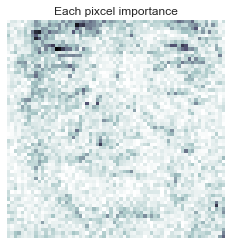

In [272]:
fi = r_forest.feature_importances_ # 각 픽셀 별 정보획득량 평균(중요도)

fi_2 = fi.reshape(data.images[0].shape)

plt.imshow(fi_2, cmap=plt.cm.bone_r)
plt.axis('off')
plt.title('Each pixcel importance')
plt.show()

In [273]:
accuracy_score(y_test, r_forest.predict(x_test))

0.97

In [33]:
# 연습문제 3
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score 

data = load_breast_cancer()
x = data.data
y = data.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

# extreme random forest 모델 
tree = ExtraTreesClassifier(random_state=0, n_estimators=250)
tree.fit(x_train, y_train)

print(f'훈련용 데이터에 대해 교차검증 평균성능 : {cross_val_score(tree, x_train, y_train, scoring="accuracy", cv=5).mean()}')
print(f'테스트용 데이터에 대해 교차검증 평균성능: {cross_val_score(tree, x_test, y_test, scoring="accuracy",cv=5).mean()}')

훈련용 데이터에 대해 교차검증 평균성능 : 0.9623734177215191
테스트용 데이터에 대해 교차검증 평균성능: 0.9532773109243697


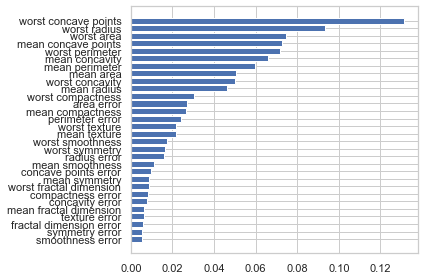

In [34]:
importances = tree.feature_importances_
indice = np.argsort(importances)
%matplotlib inline
plt.barh(range(len(importances)), importances[indice])
plt.yticks(range(len(importances)), data.feature_names[indice])
plt.tight_layout()
plt.show()